# Zajęcia 09 - Sieci mózgowe

## Plan dzisiejszych zajęć
* zapoznanie z biblioteką `ipyvolume` do wizualizacji 3d
* wczytujemy powierzchnię kory mózgu
* wyświetlamy korę
* problem z przezroczystością - stosujemy w związku z tym zamiast powierzchni punkty
* wczytujemy wybraną sieć (jedną osobę uczestniczącą w badaniu DTI dr Natalii Kowalczyk)
* wyświetlamy ją jako macierz
* (wyświetlamy połączenia w 2D z użyciem networkx)
* wyświetlamy połączenia w 3D
* robimy proste analizy na ilości połączeń czołowo-ciemieniowych
* robimy analizy grafowe
* robimy analizy grafowe na części sieci (połączeniach czołowo-ciemieniowych)

(ostatni punkt będzie bonusowy i dodam go później)  
Zacznijmy od znanych nam dobrze importów:

In [1]:
import os
import numpy as np

W tym notebook'u będziemy między innymi wizualizować sieci mózgowe.
Tego rodzaju sieci możemy wizualizować w 2D, ale najbardziej intuicyjny
sposób to wizualizacja sieci w przestrzeni mózgu, tzn. w 3D. Podstawowe
wizualizacje 3D można wykonywać w matplotlib'ie ale przy większej liczbie
punktów interakcja z tego rodzaju wykresami jest bardzo powolna. W naszym
wypadku będziemy mieli do wyświetlenia dziesiątki tysięcy elementów dlatego
skorzystamy z biblioteki bardziej sprawnej w trójwymiarowych wizualizacjach:
`ipyvolume`. Aby ją zainstalować potrzebujesz wykonać następujące kroki **w konsoli**:
```
pip install ipyvolume
jupyter nbextension enable --py --user ipyvolume
jupyter nbextension enable --py --user widgetsnbextension
```
pierwsza komenda instaluje bibliotekę. Dwie kolejne definiują dodatkowe ustawienia
jupyter notebook'a potrzebne do sprawnego działania ipyvolume w notebook'u.
Po instalacji powinien Ci zadziałać import poniżej:

In [2]:
import ipyvolume.pylab as ipv

Pamiętaj również aby ściągnąć nowszą wersję pliku `emosie.py` - dodałem do niego na potrzebę dzisiejszych zajęć trochę kodu (plik ma teraz ponad 350 linijek).  
Po instalacji ipyvolume oraz posiadając nową wersję `emosi` powinnaś/powinieneś móc zobaczyć czworościan po odpaleniu kodu poniżej:

In [4]:
from emosie import test_ipyvolume
test_ipyvolume()

A Jupyter Widget

Korzystanie z biblioteki `ipyvolume` nie jest dużo trudniejsze od robienia wykresów w `matplotlib` - nie będziemy się tego uczyć, ale dla zobrazowania prostoty podstawowego interfejsu programistycznego poniżej przykład.  
Twoje zadanie to uzupełnić ten kod tak aby:
* tworzone było 15 losowych wartości dla zmiennych x, y oraz z (podajemy funkcji `np.random.rand` liczbę punktów)
* wykorzystanie funkcji `scatter` pakietu `ipyvolume` aby wyświetlić punkty o koordynatach x, y, z
* podać w funkcji `scatter` rozmiar punktów na `5`

In [5]:
# tworzymy 15 losowych wartości dla osi x, y oraz z
x = np.random.rand(__)
y = np.random.rand(__)
z = np.random.rand(__)

# tworzymy wykres, rysujemy rozrzut, wyświetlamy
fig = ipv.figure()
ipv._______(x, y, z, size=_)
ipv.show()

A Jupyter Widget

Zachęcam do eksploracji interfejsu ipyvolume (obracanie, mouse wheel oraz guziki na górze). Szczególnej uwadze polecam guzik do stereoskopowego podglądu. Rozbija on obraz na dwa, niemal identyczne, ale różniące się trochę perspektywą (tak jak różni się perspektywa lewego i prawego oka). Jeżeli jako dzieci bawiliście się książkami ze stereogramami powinniście umieć tak ustawić oczy aby lewy i prawy obraz nałożyły wam się w 3d.  
Dla pozbawionych tego aspektu dzieciństwa przykład stereogramu poniżej, trzeba na obraz spojrzeć tak jakby był szybą przez którą patrzymy na interesujący nas obiekt. Możecie sobie wyobrazić że obserwujecie coś co znajduje się za monitorem (ścianę, inną osobę). Przy odpowiednim ułożeniu gałek ocznych zobaczycie trójwymiarowy kształt w obrazie poniżej, jaki to kształt?
<img src="http://upanh.ssc.vn/stereogram/stereogram%20%2823%29.jpg" width='700px'>

Wczytamy teraz powierzchnię mózgu oraz zdefiniowane w badaniu obszary (węzły). Komenda `read_brain()` będzie działać jeżeli odpowiednie pliki (`emosie -> data -> surfaces and nodes`) znajdują się w tym samym folderze co notebook.

In [6]:
from emosie import read_brain

brain = __________()

Wczytana zmienna `brain` to słownik:

In [7]:
type(brain)

dict

Zobaczmy jakie ma klucze (`keys`):

In [8]:
brain.____()

dict_keys(['surface', 'nodes'])

W `'surfaces'` przetrzymywane są informacje dotyczące powierzchni kory mózgowej, natomiast w `'nodes'` mamy informacje o koordynatach wybranych obszarów (węzłów). Zobaczmy co znajduje się pod kluczem `'surface'`:

In [9]:
brain['surface']

{'tri': array([[    0, 15657, 15606],
        [    0, 15606, 15602],
        [    0, 15602,     1],
        ..., 
        [53460, 53432, 41973],
        [53460, 41973, 42032],
        [53460, 42032, 53468]]),
 'x': array([-11.636414, -14.324493, -14.616615, ...,  36.664593,  40.258259,
         31.013245]),
 'y': array([-5.224724, -5.310173, -4.96962 , ..., -3.240486,  7.830475,  8.43177 ]),
 'z': array([ 75.270851,  76.498562,  75.305363, ..., -46.947861, -47.503784,
        -46.904205])}

To klasyczna reprezentacja powierzchni: `x`, `y` oraz `z` to koordynaty punktów tworzących powierzchnię, natomiast `tri` to informacja o tym jak te punkty są połączone w małe trójkąty, z których faktycznie zbudowana jest powierzchnia.  
Czas wyświetlić ten mózg! Skorzystamy do tego z funkcji `plot_brain`, którą dla Was przygotowałem:

In [10]:
from emosie import plot_brain

Skorzystaj z funkcji `plot_brain` podając jej:
* zmienną `brain` (wszystkie informacje dotyczące powierzchni mózgu)
* argument nazwowy `surface='full'` aby wyświetlać całą powierzchnię mózgu
* `nodes=False` aby nie wyświetlać węzłów

In [11]:
plot_brain(_____, ____________, ________);

A Jupyter Widget

Oto mózg, całkiem ładny, prawda? Aby (spróbować) zobaczyć węzły możesz użyć komendy tak jak wyżej ale albo usunąć `nodes=False` albo zmienić na `nodes=True` (`nodes=True` jest domyślne, więc nie musisz go zmieniać, gdy nie podasz wartości tego argumentu, przyjmie on wartość domyślną).

In [12]:
plot_brain(_____, _____________);

A Jupyter Widget

Większości węzłów w ogóle nie widać - chowają się w głębi bruzd, a nawet pod korą. Pomogłoby ustawienie dla kory przezroczystości, ale `ipyvolume` jest młodą biblioteką i jeszcze tego nie umożliwia. :( W związku z tym, zamiast rysować całą powierzchnię kory, stworzymy delitkatną mgiełkę konturów mózgu (to domyślne ustawienie dlatego nie musicie podawać dodatkowych argumentów poza samym mózgiem):

In [13]:
plot_brain(brain);

A Jupyter Widget

Teraz widzimy wszytkie węzły.  
Jeżeli "mgiełka" mózgu jest zbyt delikatna w wykresie powyżej, możesz skorzystać z argumentu `dot_size`. Domyślna wartość tego argumentu to `0.1` (wykres powyżej) dlatego możesz ją np. zwiększyć do `0.2` albo `0.3`:

In [14]:
plot_brain(brain, dot_size=___);

A Jupyter Widget

Wybierz tę wersję wielkości "mgiełki", która bardziej Ci się podoba. Zanim przejdziesz dalej przyjżyj się z bliska "mgiełce" (*mouse wheel* przybliża/oddala) - z jakich elementów jest zbudowana? Dlaczego?  
  
## Wczytujemy połączenia
Połączenia poszczególnych osób badanych są przechowywane w plikach tekstowych. Musisz ustawić poprawną ścieżkę do folderu z tymi plikami (do ściągnięcia z githuba `emosie -> data -> fibers`).

In [96]:
fibers_dir = r'C:\Users\Sarenka\Dropbox\Sarenka\ZAJECIA\Sieci\notebooks\fibers'
files = os.listdir(fibers_dir)
print(files[:3])

['01_vgp1_dti.txt', '03_vgp1_dti.txt', '05_vgp1_dti.txt']


`vgp1` w nazwie oznacza osobę z grupy **VGP** (*Video Game Players*), natomiast `vgp0` oznacza grupę **NVGP** (*Non-Video Game Player*).  
Wczytajmy pierwszy plik:

In [16]:
from emosie import read_fibers

fibers = read_fibers(os.path.join(fibers_dir, files[_]))

W `fibers` mamy teraz macierz połączeń (zaraz zobaczysz co to takiego). Przyda nam się do wizualizacji macierzy połączeń `seaborn`:

In [17]:
import seaborn as sns
%matplotlib inline

Skorzystaj z funkcji `heatmap` aby wyświetlić macierz połączeń `fibers`:

(0.0, 90.0, 90.0, 0.0)

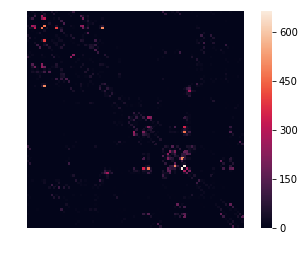

In [18]:
ax = sns._______(______, square=True)

# usuwamy oznaczenia osi x i y
ax.axis('off')

Każdy kwadracik w mapie cieplnej powyżej obrazuje liczbę włókien łączących dane dwa regiony (każdy wiersz i każda kolumna to jakiś region). Tego rodzaju dane nazywamy *macierzą sąsiedztwa*: ma format macierzy i opisuje które węzły są ze sobą połączone (są bezpośrednimi sąsiadami w grafie).  
Obrazek jest symetryczny ponieważ nie jesteśmy w stanie powiedzieć nic o kierunku połączeń: czy biegną z regionu A do regionu B czy odwrotnie. Dzięki tej symetrii możemy w nim dostrzec różne stwory i pyszczki. Przybliżmy sobie na przykład fragment macierzy odpowiadający wierszom od 45 do 75 (co odpowiada adresowaniu `45:76` dla pierwszego wymiaru macierzy) oraz tym samym kolumnom (od 45 do 75). Aby wyświetlić fragment macierzy musisz ją zaadresować korzystając ze składni:
```python
macierz[adresy_dla_pierwszego_wymiaru, adresy_dla_drugiego_wymiaru]
```

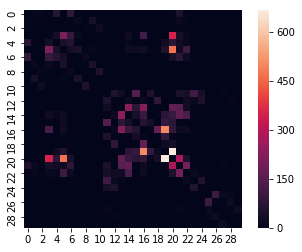

In [19]:
sns.heatmap(fibers[_____, _____], square=True)

Wyraźnie widać, że niektóre obszary (wiersze i kolumny) są silniej połączone niż inne. Ilość włókien (oszacowana) łączących dwa regiony mózgu potrafi sięgać aż 600, ale za silnie połączone możemy uznawać już te obszary, które łączy ponad 100 włókien. Zobaczmy najpierw jak dużo jest takich obszarów: stworzymy nową macierz, która będzie informować dla każdego połączenia czy liczy ponad 100 włókien, a następnie wyświetlimy ją tak samo jak tę powyżej. Dodamy argument `cbar=False` do funkcji `heatmap` aby nie rysować legendy dla skali kolorystycznej.

(0.0, 90.0, 90.0, 0.0)

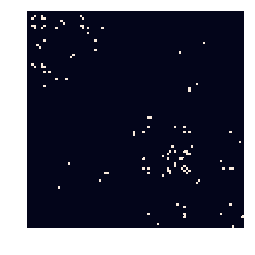

In [20]:
czy_ponad_100 = fibers > ___
ax = sns.heatmap(czy_ponad_100, square=True, __________)
ax.axis('off')

Aby lepiej zrozumieć jak silnie połączone są ze sobą różne obszary, wyświetlimy sobie histogram ilości połączeń. Będziemy w stanie lepiej oszacować jak dużo jest połączeń o danej liczbie włókien. Macierz `fibers` jest dwuwymiarowa, aby wyświetlić ją z użyciem funkcji `distplot` rozwijamy ją korzystając z metody `ravel`:

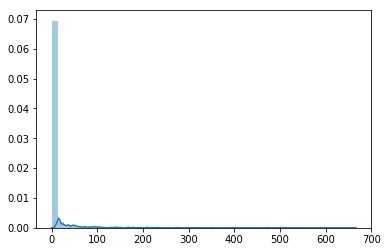

In [21]:
sns.________(fibers._____())

Jest bardzo dużo połączeń o niewielkiej liczbie włókien (większość połączeń ma 0 włókien, czyli dane dwa obszary nie łączy ani jedno włókno). Zobaczmy tylko połączenia liczące ponad 4 włókna:

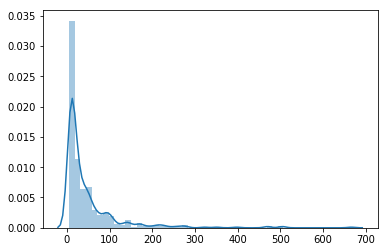

In [22]:
more_fibers = fibers[fibers > _]
sns.distplot(more_fibers)

Teraz widzimy rozkład połączeń nieco lepiej - jest bardzo skośny. Aby przynajmniej częściowo poradzić sobie z tą skośnością zastosujemy logarytmizację. W komórce poniżej zlogarytmizuj zmienną `more_fibers` (jeżeli nie wiesz jak - zapytaj się internetów).

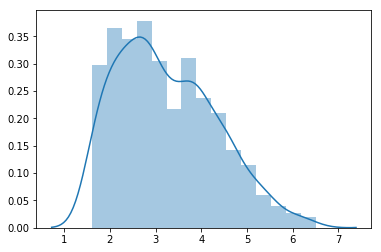

In [24]:
sns.distplot(np.___(more_fibers))

Jak dużo procentowo jest połączeń wynoszących zero? Sprawdźmy to:
* porównaj `fibers` do zera - to daje macierz wartości prawda-fałsz opisujących czy dany element macierzy jest zerem
* następnie uśrednij tę macierz - to da Ci proporcję prawd (a więc ilości włókien równych zero).

In [43]:
(______ == _).____()

0.84271604938271605

Ponad 80% par obszarów nie jest połączona ani jednym włóknem.  

## Grafy
Skorzystamy teraz z biblioteki grafowej `networkx` aby wyświetlić graf połączeń (biblioteka ta powinna być zainstalowana wraz z dystrybucją Anaconda).

In [44]:
import networkx as nx

Z macierzy połączeń `fibers` możemy skonstruować graf korzystając z metody `from_numpy_matrix` pakietu `networkx`.

In [45]:
graph = __._______________(fibers)

Sprawdzamy czy zostały wczytane własności połączeń (waga). Wyświetl poniżej własności połączenia między pierwszym a trzecim węzłem (pamiętaj, że indeksowanie w pythonie jest od zera!).

In [77]:
graph.get_edge_data(_, _)

{'weight': 16}

Jeżeli zastanawia Cię co to za węzły, nazwy możesz sprawdzić korzystając z `brain['nodes']['name'][indeks_węzła]`:

In [ ]:
brain['nodes']['name'][0]

Rozszerzenia tych nazw powinny być do zgadnięcia albo wyszukania w internecie. :)  
  
Czas narysować graf, skorzystamy z funkcji `draw` pakietu `metworkx` podając nasz graf (zmienna `graph`) oraz rozmiar węzłów ustawiając na `100`:

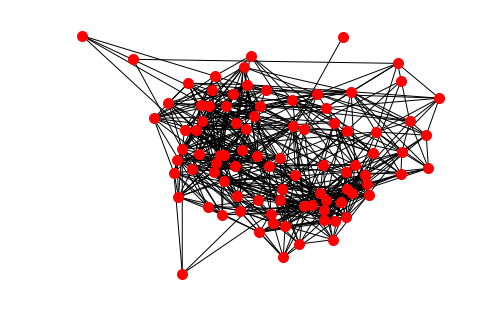

In [78]:
nx.____(_____, node_size=___)

Rozłożenie węzłów w dwuwymiarowej przestrzeni celem czytelnej wizualizacji to niełatwe zadanie i automatycznie nie zawsze wychodzi dobrze. Kiedy do wykresu powyżej dodamy jeszcze etykiety węzłów, wykres będzie mało czytelny (przy czym zwróć uwagę, że przy każdym narysowaniu wykresu węzły będą układane trochę inaczej):

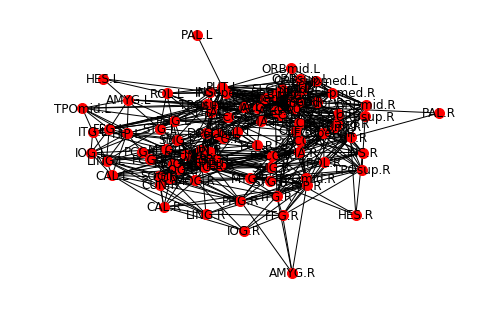

In [79]:
# uwaga, czarna magia! wyciągamy wszystkie nazwy węzłów jako słownik:
node_names = {idx: name for idx, name in enumerate(brain['nodes']['name'])}

# poniżej już rzecz jaśniejsza, wyświetlamy graf tak jak wcześniej,
# tym razem podajemy jednak nazwy węzłów (zmienna utworzona powyżej)
# do argumentu nazwowego `labels`
nx.____(_____, node_size=100, labels=_________)

Wspaniale, teraz wykres jest nieczytelny! Możemy spróbować użyć innego ułożenia węzłów, ale przy tej ilości węzłów, połączeń i etykiet i tak nie otrzymamy czytelnego efektu:

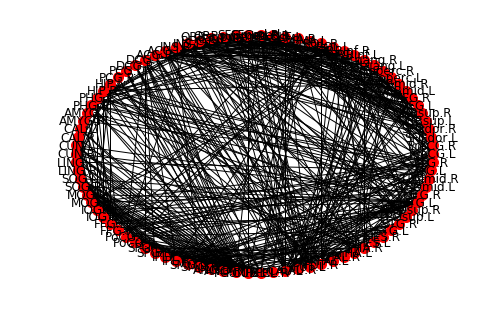

In [82]:
nx.draw(graph, node_size=100, labels=node_names, pos=nx.circular_layout(graph))

W związku z tym do wizualizacji połączeń będziemy korzystać z mojego `plot_brain`, natomiast `networkx` wykorzystamy do liczenia różnych miar dla sieci. Jedną z takich miar jest najkrótsza ścieżka. Policzmy poniżej jaka jest najkrótsza ścieżka łącząca węzeł `0` oraz węzeł `5`:

In [81]:
nx.shortest_path(graph, source=_, target=_)

[0, 2, 7, 5]

Widzimy, że aby dotrzeć z węzła 0 do węzła 5 najszybciej (najmniejszą liczbą najsilniejszych połączeń) musimy najpierw udać się do węzła 2, następnie do 7 i w końcu możemy dojść do węzła 5. Najkrótsza ścieżka między węzłami 0 i 5 wynosi w związku z tym 3 - trzeba wykonać trzy kroki aby z węzła 0 przejść do węzła 5 (gdy mamy do czynienia z ważoną siecią opis jest trochę bardziej złożony, bo w podróży liczy się nie tylko liczba połączeń do pokonania, ale także jak szybkie są te połączenia, gdzie "szybkość" to po prostu waga połączenia).  
W tym notebook'u będziemy liczyć tzw. *global efficiency*, które jest powiązane z najkrótszą ścieżką. *global efficiency* to odwrotność średniej najkrótszej ścieżki w sieci (tzn. niezależnie od tego między jakimi dwoma węzłami chcemy się przemieścić), określa więc efektywność komunikacji: wysokie *global efficiency* występuje gdy między dowolnymi dwoma węzłami sieci można przemieścić się szybko; niskie *global efficiency* występuje natomiast gdy podróż taka trwałaby długo.  
Oblicz z użyciem `networkx` *global efficiency* dla wczytanej sieci (nazwa funkcji powinna być oczywista z nazwy miary, którą chcemy policzyć :P).

In [83]:
nx.________________(_____)

0.5216396171452525

## Wizualizacja połączeń w `plot_brain`

Domyślnie `plot_brain` korzysta z takiej palety kolorystycznej do wyświetlania siły połączeń:

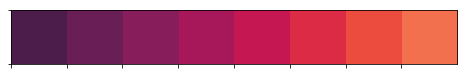

In [25]:
colors = sns.cm.rocket(np.linspace(0.2, 0.7, num=8))
sns.palplot(colors)

Jaśniejszy kolor to silniejsze połączenie. Przekonaj się zresztą sam(a), skorzystaj z `plot_brain` poniżej podając macierz połączeń do argumentu nazwowego `network`:

In [28]:
plot_brain(brain, network=______);

A Jupyter Widget

A Jupyter Widget

`plot_brain` umożliwia kontrolę wielu aspektów wykresu. Poniżej skorzystasz z kilku z nich:
* ustaw argument `min_fibers` na `5` aby nie wyświetlać połączeń poniżej pięciu włókien
* ustaw `max_fibers` na `500` aby najwyższy kolor skali kolorystycznej odpowiadał 500 włóknom
* ustaw `cmap` na `'hot'` aby zmienić paletę kolorystyczną na paletę `'hot'`
* ustaw `highest_cmap_color` na `0.8` aby nie korzystać z górnych 20% kolorów skali kolorystycznej (są bardzo jasne, mogą nie być widoczne na białym tle)

In [41]:
plot_brain(brain, network=______, min_fibers=_, max_fibers=___, cmap=_____, highest_cmap_color=___);

A Jupyter Widget

Idealnie byłoby reprezentować siłę połączeń grubością linii, ale kontrola grubości linii jeszcze nie jest możliwa w `ipyvolume`. Trzeba by tworzyć trójwymiarowe obiekty np. walce o średnicy zależnej od siły połączenia, ale nie dodałem tej opcji jeszcze do `plot_brain`.  
W ramach ćwiczenia wczytaj połączenia dla innego badanego i wyświetl poniżej wybierając parametry `plot_brain` opisane wcześniej według swojego uznania.

In [ ]:
# wczytujemy fibers

In [ ]:
# wyświetlamy z użyciem plot_brain

## Analiza różnic w global efficiency
Czas na analizę grupową. Umiemy już wczytywać pliki, zamieniać je na graf oraz liczyć *global efficiency*. Policzmy teraz ten wskaźnik dla każdego badanego (z podziałem na grupy). Najpierw znajdujemy pliki, które należą do grupy `vgp` oraz `nvgp`:

In [97]:
# to może być czarna magia dla Was, ale wybieramy pliki zawierające
# napis 'vgp1' (gracz) bądź 'vgp0' (nie-gracz)
vgp_files = [f for f in files if 'vgp1' in f]
nvgp_files = [f for f in files if 'vgp0' in f]

Zobaczmy pliki reprezentujące graczy (zwróć uwagę, że do dyspozycji masz tylko pliki o nieparzystych identyfikatorach, a więc nie dysponujesz całą bazą danych, z których korzystała Natalia):

In [98]:
vgp_files

['01_vgp1_dti.txt',
 '03_vgp1_dti.txt',
 '05_vgp1_dti.txt',
 '07_vgp1_dti.txt',
 '09_vgp1_dti.txt',
 '11_vgp1_dti.txt',
 '13_vgp1_dti.txt',
 '15_vgp1_dti.txt',
 '31_vgp1_dti.txt',
 '33_vgp1_dti.txt',
 '35_vgp1_dti.txt',
 '39_vgp1_dti.txt',
 '41_vgp1_dti.txt',
 '43_vgp1_dti.txt',
 '47_vgp1_dti.txt',
 '49_vgp1_dti.txt',
 '50_vgp1_dti.txt',
 '61_vgp1_dti.txt']

Teraz czas na analizę! Najpierw rozprawimy się z graczami.  
Za pomocą pętli `for` bierzemy kolejne nazwy plików z `vgp_files` - za każdym razem bieżący plik nazywając `vgp_file`. dla każdego pliku `vgp_file`:
* wczytujemy go jako zmienną `fibers`
* zamieniamy na graf, tak jak wcześniej
* liczymy global efficiency i zapisujemy w zmiennej `glob_eff`
* wreszcie doklejamy tę zmienną do listy `vgp_global_efficiency`

In [99]:
vgp_global_efficiency = list()

for vgp_file in vgp_files:
    # wczytujemy dany plik (`vgp_file`)
    ______ = read_fibers(os.path.join(fibers_dir, ________))
    # zamieniamy go w graf
    graph = nx.from_numpy_array(______)
    # liczymy global efficiency
    glob_eff = nx.global_efficiency(_____)
    # doklejamy do listy vgp_global_efficiency
    vgp_global_efficiency.append(________)

# zamieniamy na końcu listę na numpy array:
vgp_global_efficiency = np.array(vgp_global_efficiency)

Mamy teraz dla każdego badanego z grupy **VGP** policzone *global efficiency*:

In [ ]:
vgp_global_efficiency

Analogiczne kroki stosujemy dla nie-graczy (lista nazw plików `nvgp_files):

In [100]:
nvgp_global_efficiency = list()

for nvgp_file in nvgp_files:
    ______ = read_fibers(os.path.join(fibers_dir, _________))
    graph = nx.from_numpy_array(______)
    glob_eff = nx.global_efficiency(_____)
    nvgp_global_efficiency.append(_______)

# zamieniamy listę na numpy array:
nvgp_global_efficiency = np.array(nvgp_global_efficiency)

Czy obserwujemy różnice między graczami i nie-graczami w global efficiency? Skorzystajmy z prostego testu t:

In [101]:
from scipy.stats import ttest_ind

Porównaj `vgp_global_efficiency` oraz `nvgp_global_efficiency` testem t:

In [102]:
ttest_ind(_________________, ______________________)

Ttest_indResult(statistic=0.97610696973257116, pvalue=0.33656753797380767)

Tak samo jak w badaniu Natalii - nie obserwujemy różnic w globalnej efektywności sieci (ale uchylę rąbka tajemnicy: obserwujemy w efektywności sieci potyliczno-ciemieniowych).

## Analiza połączeń potyliczno-ciemieniowych
W badaniu Natalii gracze mają więcej (sumarycznie) połączeń potyliczno-ciemieniowych. Aby przeprowadzić taką analizę potrzebujemy indeksów węzłów ciemieniowych oraz indeksów węzłów potylicznych:

In [103]:
visual = np.array([43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54]) - 1
parietal = np.array([57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70]) - 1

(Odejmujemy `1` ponieważ część analiz była robiona wcześniej w matlabie, skąd skopiowałem adresy węzłów należących do regionów ciemieniowych i potylicznych. W matlabie indeksowanie jest od 1, a w pythonie od 0, więc trzeba odjąć od matlabowych indeksów 1).  
Sprawdźmy nazwę pierwszego węzła ciemieniowego:

In [107]:
brain['nodes']['name'][parietal[0]]

'PoCG.L'

`'PoCG'` to **Po**st**c**entral **g**yrus natomiast `L` odnosi się do lewego.  
Narysujemy sobie teraz węzły potyliczne i ciemieniowe różnymi kolorami:

In [110]:
# definiujemy grupy: 0 to będą 'pozostałe węzły'
node_groups = np.zeros(90)
# jedynki to węzły potyliczne
node_groups[visual] = 1
# dwójki to węzły ciemieniowe
node_groups[parietal] = 2
# wartości grup stanowią indeksowaniki do listy kolorów
# (tzn. grupa 0 to kolor o indeksie 0 z listy poniżej)
group_colors = ['gray', 'green', 'red']

# wyświetlamy węzły, opisując ich grupy i kolory grup
plot_brain(brain, node_groups=node_groups, node_colors=group_colors);

A Jupyter Widget

Zobaczmy teraz wycinek macierzy połączeń `fibers` dla połączeń węzłów `visual` oraz `parietal`:

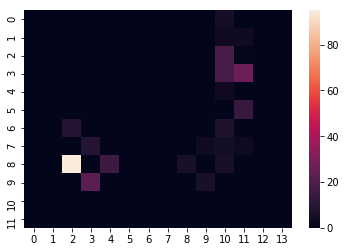

In [112]:
sns.heatmap(______[______][:, ________])

Jak policzyć ogólną sumę wszystkich tych połączeń? Doklejmy do adresowania zmiennej `fibers` odpalenie metody sumującej tzn. `.sum()`

In [113]:
fibers[______][:, ________].___()

283

Ta akurat osoba ma w sumie `283` połączenia potyliczno-ciemieniowe, brawo! :)

Teraz analizujemy wszystkie osoby:

In [114]:
vgp_vispar_sum = list()

for vgp_file in vgp_files:
    # wczytujemy dany plik (`vgp_file`)
    ______ = read_fibers(os.path.join(fibers_dir, _______))
    # liczymy połączenia potyliczno-ciemieniowe
    sum_fibers = fibers[_____][:, ________].sum()
    # doklejamy do listy vgp_global_efficiency
    vgp_vispar_sum.append(sum_fibers)

# zamieniamy listę na numpy array:
vgp_vispar_sum = np.array(vgp_vispar_sum)

In [115]:
nvgp_vispar_sum = list()

for nvgp_file in nvgp_files:
    # wczytujemy dany plik (`nvgp_file`)
    ______ = read_fibers(os.path.join(fibers_dir, _________))
    # liczymy połączenia potyliczno-ciemieniowe
    sum_fibers = fibers[visual][:, parietal].sum()
    # doklejamy do listy vgp_global_efficiency
    nvgp_vispar_sum.append(sum_fibers)

# zamieniamy listę na numpy array:
nvgp_vispar_sum = np.array(nvgp_vispar_sum)

In [116]:
ttest_ind(vgp_vispar_sum, nvgp_vispar_sum)

Ttest_indResult(statistic=4.4273174804354527, pvalue=0.00011001389716204778)

Tak samo jak w badaniu Natalii, obserwujemy istotną różnicę (u Was będzie trochę inna, [ba, może nawet różnica nie będzie istotna!] bo za pierwszym razem skopałem w drugiej pętli nazwę zmiennej i nie odpalam już całego notebooka aby poprawić wyświetlony wynik). Rozkład sumy liczby połączeń może być bardzo skośny więc możesz jeszcze powtórzyć test powyżej logarytmizując każdą ze zmiennych. W badaniu Natalii korzystaliśmy do takich porównań z testów permutacyjnych, bardziej odpornych na rozkłady odbiegające od normalnego, ale na dziś tyle wystarczy! Mam nadzieję że materiał pomógł co nieco zrozumieć pod kątem podstaw analiz sieciowych.